# Gradient descent for linear regression and polynomial fits

author: Elizabeth A. Barnes


In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats, odr


import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (12.0/2, 8.0/2)

In [2]:
# random numbers
get_ipython().run_line_magic('env', 'PYTHONHASHSEED=99')
# %env PYTHONHASHSEED=99
np.random.seed(99)

env: PYTHONHASHSEED=99


# Gradient descent for linear regression

I got this linear regression material from the following site. The main gif and github links are also provided below.

Main Page:
https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931

github: 
https://github.com/chasinginfinity/ml-from-scratch/tree/master/02%20Linear%20Regression%20using%20Gradient%20Descent

gif showing gradient descent at work: 
https://github.com/chasinginfinity/ml-from-scratch/blob/master/02%20Linear%20Regression%20using%20Gradient%20Descent/animation1.gif

In [3]:
# Input data
url = 'https://github.com/chasinginfinity/ml-from-scratch/raw/master/02%20Linear%20Regression%20using%20Gradient%20Descent/data.csv'
data = pd.read_csv(url)

X = np.array(data.iloc[:, 0])
X = X-np.mean(X)
Y = np.array(data.iloc[:, 1])

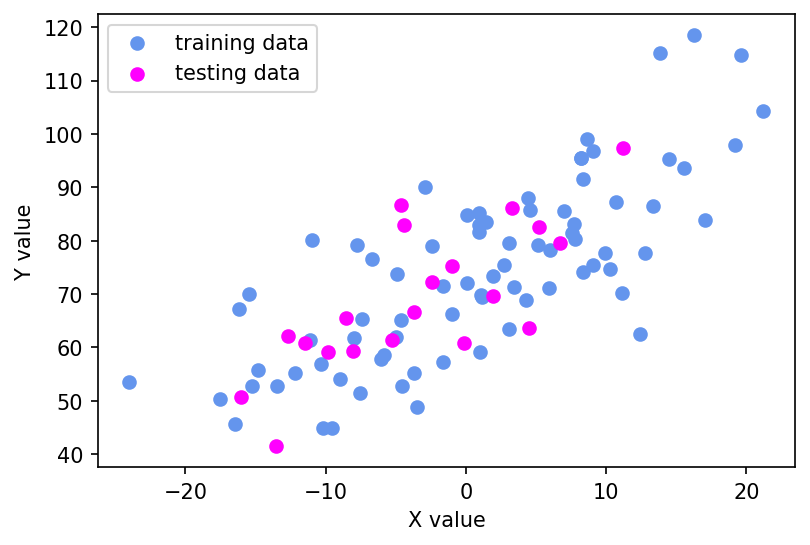

In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)           # split the data into training and testing samples, 
                                                                               # MODIFY: "test_size" means the fraction of data to be used for testing, 
                                                                               # the rest is training

plt.scatter(Xtrain, Ytrain, color='cornflowerblue', label='training data')
plt.scatter(Xtest, Ytest, color='fuchsia', label = 'testing data')
plt.xlabel('X value')
plt.ylabel('Y value')
plt.legend()
plt.show()

In [5]:
# define functional fits
def my_fit(m,c,x):
    # m is the slope of the line
    # c is the y-intercept
    # x is the values to evaluate
    # output: y, the evaluated values
    y = m*x + c
    return y

def my_gradLoss(xtrain,ytrain,ypred):
    n = float(len(xtrain))
    gradLoss_m = 2/n * sum(xtrain * (ypred-ytrain)) #derivative wrt m
    gradLoss_c = 2/n * sum((ypred-ytrain)) #derivative wrt c
    
    return gradLoss_m, gradLoss_c

In [6]:
# Building the model
m = np.random.uniform()
c = np.random.uniform()

L = 0.0001                                                         # MODIFY: the learning rate - the size of the "step" to take down gradient
epochs = 40000                                                     # MODIFY: the number of iterations to run over the entire training set 

errorHistory = np.empty((epochs,))
# Performing Gradient Descent 
for i in range(epochs): 

    Y_pred = my_fit(m,c,Xtrain)                                    # the current predicted value of y
    gradLoss_m, gradLoss_c = my_gradLoss(Xtrain, Ytrain, Y_pred)   # compute the direction of down gradient of the loss function with respect to the coefficients
    m = m - L * gradLoss_m                                         # update the slope m
    c = c - L * gradLoss_c                                         # update the y-intercept c
    
    errorHistory[i] = 1/float(len(Y))*np.sum((Ytrain - Y_pred)**2)
    
print('done training')    
print('')
print('  slope (m)             y-int (c)')
print('----------------------------------')
print (str(np.around(m,5)) + '                 ' + str(np.around(c,5)))


done training

  slope (m)             y-int (c)
----------------------------------
1.28062                 73.00992


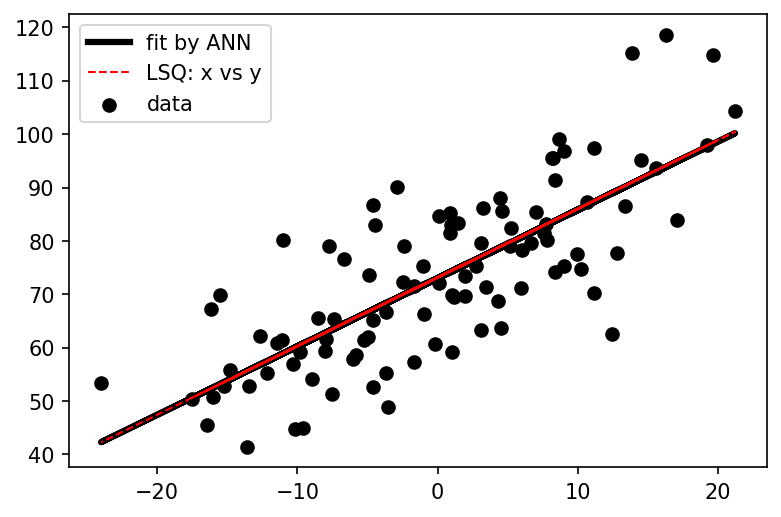

In [7]:
# Making predictions - FINAL
Y_pred = my_fit(m,c,Xtrain)
Y_predTest = my_fit(m,c,Xtest)

plt.figure()
plt.scatter(X, Y, color='black', label = 'data') 
# plt.plot(Xtrain, Y_pred, 'x', color='cornflowerblue', label = 'training data') 
# plt.plot(Xtest, Y_predTest, 'x', color='fuchsia', label= 'testing data') 

plt.plot(Xtrain, Y_pred,'-k', label='fit by ANN', linewidth=3) # regression line

slope, intercept, r_value, p_value, std_err = stats.linregress(np.squeeze(X),np.squeeze(Y))
plt.plot(X,intercept+X*slope,'--',color = 'red', label = 'LSQ: x vs y', linewidth=1)

plt.legend()
plt.show()

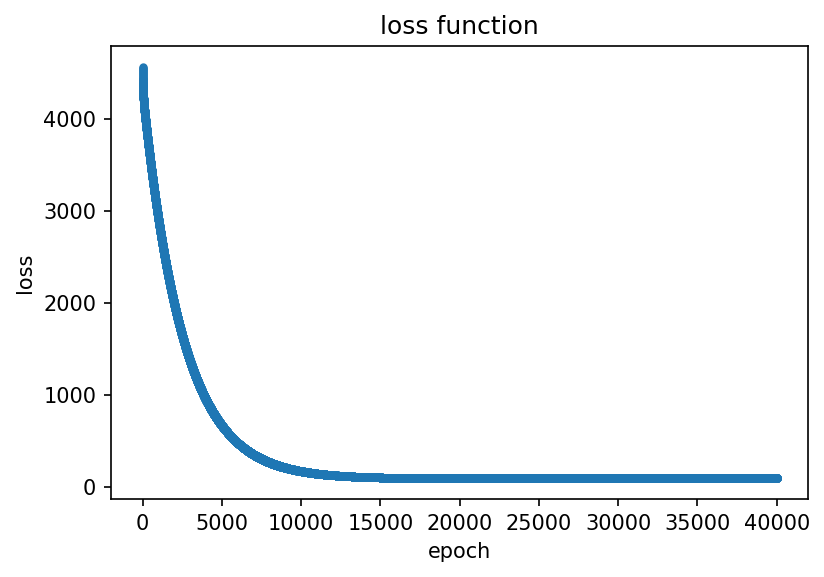

In [8]:
#print the error history
plt.figure()
plt.plot(np.arange(0,len(errorHistory)),errorHistory,'.-')
plt.title('loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# Gradient descent for polynomial regression

In [9]:
# define functional fits
def my_fit(a,x):
    # m is the slope of the line
    # c is the y-intercept
    # x is the values to evaluate
    # output: y, the evaluated values
    y = a[0] + a[1]*x + a[2]*(x**2) + a[3]*(x**3) + a[4]*(x**4) + a[5]*(x**5)
    return y

def my_gradLoss(xtrain,ytrain,ypred):
    n = float(len(xtrain))
    
    gradLoss_a = np.empty(6,)
    gradLoss_a[0] = 2/n * sum((ypred - ytrain)) #derivative wrt a0
    gradLoss_a[1] = 2/n * sum(xtrain * (ypred - ytrain)) #derivative wrt a1
    gradLoss_a[2] = 2/n * sum((xtrain**2) * (ypred - ytrain)) #derivative wrt a2
    gradLoss_a[3] = 2/n * sum((xtrain**3) * (ypred - ytrain)) #derivative wrt a3
    gradLoss_a[4] = 2/n * sum((xtrain**4) * (ypred - ytrain)) #derivative wrt a4
    gradLoss_a[5] = 2/n * sum((xtrain**5) * (ypred - ytrain)) #derivative wrt a5    
    
    return gradLoss_a

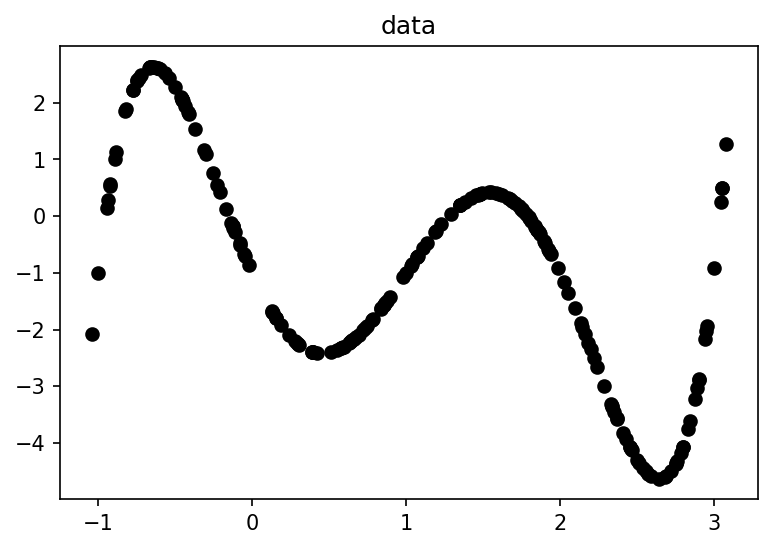

In [10]:
# make data
a_truth = -1.,-6.,5.,5.,-5,1.                           # MODIFY: vector of true/actual coefficients for the 5th order polynomial, i.e. "the truth"
x = np.random.uniform(low=-1.1,high=3.1,size=200)       
y = my_fit(a_truth,x)

plt.figure()
plt.plot(x,y,'ok')
plt.title('data')
plt.show()

In [11]:
# separate training and testing data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=41)       # split the data into training and testing samples, 
                                                                                            # MODIFY: "test_size" means the fraction of data to be used for testing, 
                                                                                            # the rest is training

# plt.scatter(Xtrain, Ytrain, color='cornflowerblue', label='training data')
# plt.scatter(Xtest, Ytest, color='fuchsia', label = 'testing data')
# plt.xlabel('X value')
# plt.ylabel('Y value')
# plt.legend()
# plt.show()

In [12]:
# Building the model
# initialize the coefficients
a = 0.,0.,0.,0.,0.,0.

L = 0.0001                                                        # MODIFY: the learning rate - the size of the "step" to take down gradient
epochs = 700_000                                                  # MODIFY: the number of iterations to run over the entire training set 

print('coefficients (a0,a1,a2,a3,a4,a5)')
print('----------------------------------')

errorHistory = np.empty((epochs,))
# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = my_fit(a, Xtrain)                                   # the current predicted value of y
    
    gradLoss_a = my_gradLoss(Xtrain, Ytrain, Y_pred)             # compute the direction of down gradient of the loss function with respect to the coefficients
    a = a - L * gradLoss_a                                       # update the a coefficients
    errorHistory[i] = 1/float(len(Y))*np.sum((Ytrain - Y_pred)**2)
    
print('done training')    
#print (a)
#print (a_truth)

coefficients (a0,a1,a2,a3,a4,a5)
----------------------------------
done training


In [13]:
#print the estimate and the truth of the coefficients
print(*zip(a,a_truth))

(-1.004429122454073, -1.0) (-5.613200248733401, -6.0) (4.858130650465894, 5.0) (4.570707011132225, 5.0) (-4.692505643385395, -5) (0.9455076816853686, 1.0)


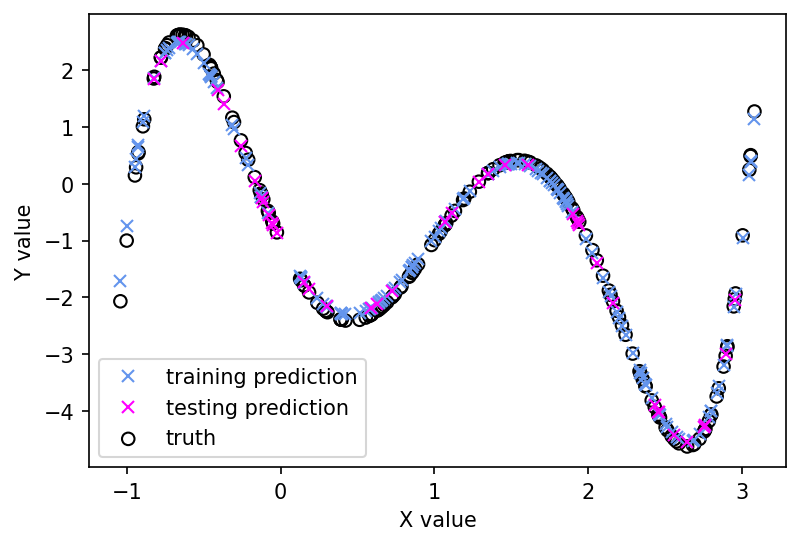

In [14]:
# plot results on training and testing data

Ypred_train = my_fit(a,Xtrain) 
Ypred_test = my_fit(a,Xtest)

plt.scatter(x, y, marker='o', color='black', label='truth', facecolors='none')

plt.plot(Xtrain, Ypred_train, 'x', color='cornflowerblue', label='training prediction')
plt.plot(Xtest, Ypred_test, 'x', color='fuchsia', label='testing prediction')

plt.xlabel('X value')
plt.ylabel('Y value')
plt.legend()
plt.show()

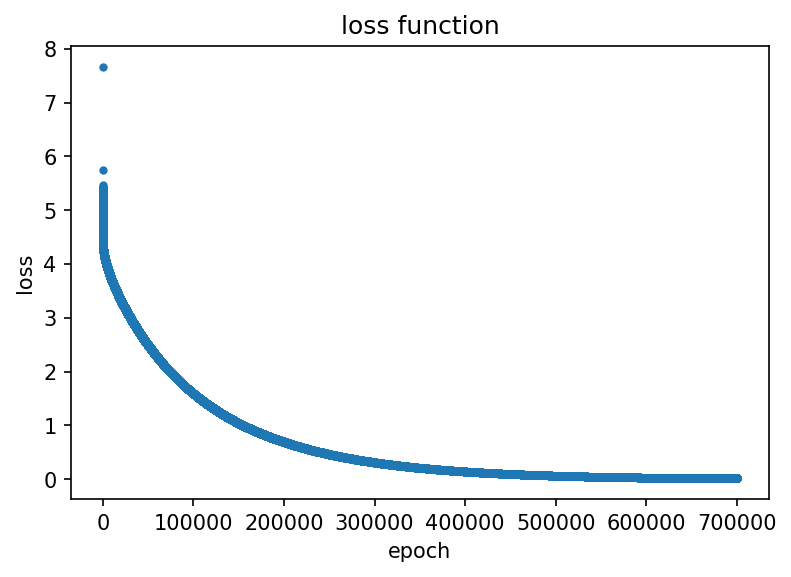

In [15]:
#print the error history
plt.figure()
plt.plot(np.arange(0,len(errorHistory)),errorHistory,'.')
plt.title('loss function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()